In [77]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
data_train.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4063,ham,Prof: you have passed in all the papers in thi...,NaN,NaN,NaN
389,ham,Yup having my lunch buffet now.. U eat already?,NaN,NaN,NaN
1364,ham,Hey i will be really pretty late... You want t...,NaN,NaN,NaN
2130,ham,Later i guess. I needa do mcat study too.,NaN,NaN,NaN
2383,ham,Your pussy is perfect!,NaN,NaN,NaN


In [78]:
data_train.shape

(5572, 5)

In [79]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [80]:
data_train.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [81]:
data_train = data_train.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [82]:
data_train.sample(5)

,v1,v2
4968,ham,I will cme i want to go to hos 2morow. After t...
790,ham,This is hoping you enjoyed your game yesterday...
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
4209,ham,No da:)he is stupid da..always sending like th...
2110,ham,Do we have any spare power supplies


In [83]:
data_train.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
data_train.rename(columns={'v1' : 'target', 'v2' : 'sms'}, inplace=True)

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_train['target']  = le.fit_transform(data_train['target'])

In [86]:
data_train.duplicated().sum()

403

In [87]:
data_train = data_train.drop_duplicates(keep='first')

In [88]:
data_train['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

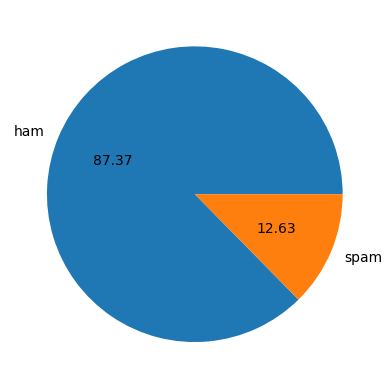

In [89]:
import matplotlib.pyplot as plt
plt.pie(data_train['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [97]:
data_train['chars'] = data_train['sms'].apply(len)
data_train['words'] = data_train['sms'].apply(lambda x : len(nltk.word_tokenize(x)))
data_train['sent'] = data_train['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [103]:
data_train[['chars', 'words', 'sent']].describe()

,chars,words,sent
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [104]:
data_train[data_train['target']==0][['chars', 'words', 'sent']].describe()

,chars,words,sent
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
data_train[data_train['target']==1][['chars', 'words', 'sent']].describe()

,chars,words,sent
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: ylabel='Count'>

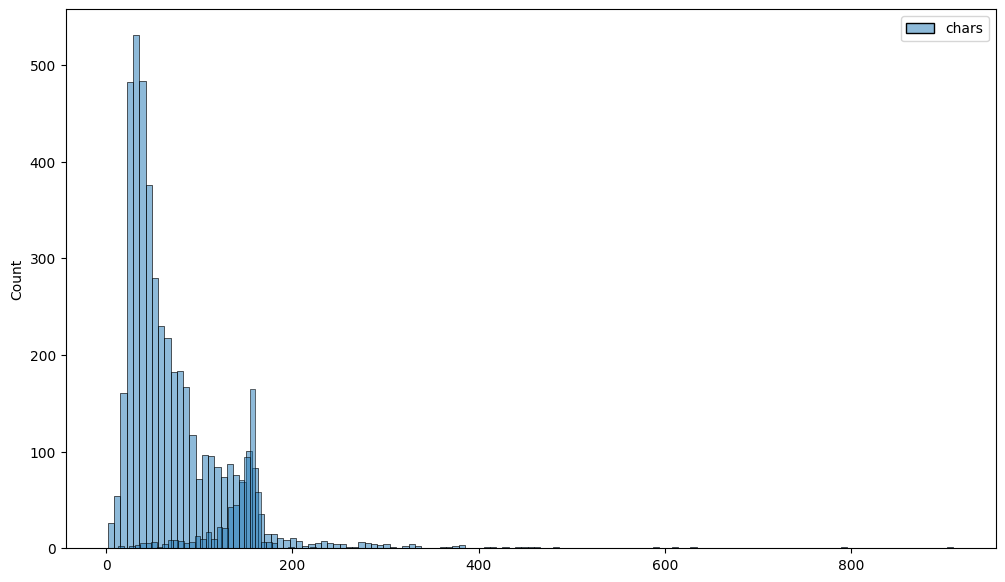

In [121]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.histplot(data_train[data_train['target']==0][['chars']])
sns.histplot(data_train[data_train['target']==1][['chars']], color='yellow')

<Axes: ylabel='Count'>

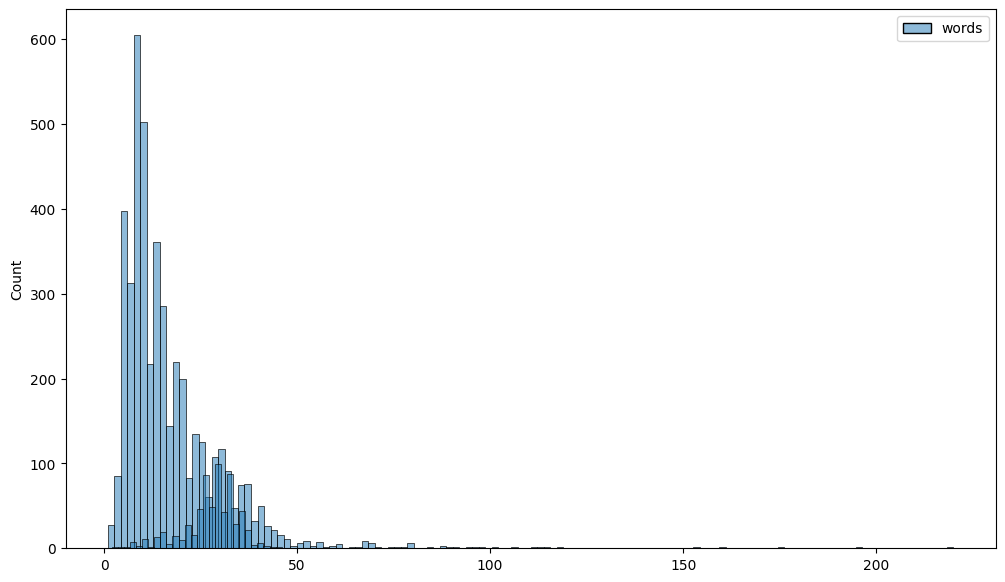

In [120]:
plt.figure(figsize=(12,7))
sns.histplot(data_train[data_train['target']==0][['words']])
sns.histplot(data_train[data_train['target']==1][['words']], color='y')

c:\Users\itsab\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


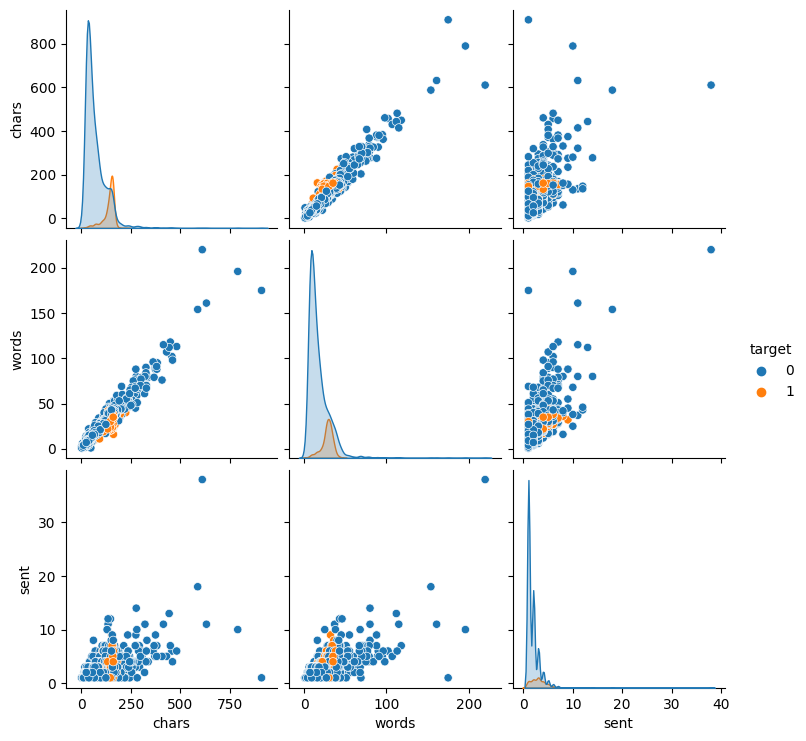

In [122]:
sns.pairplot(data_train, hue='target')

<Axes: >

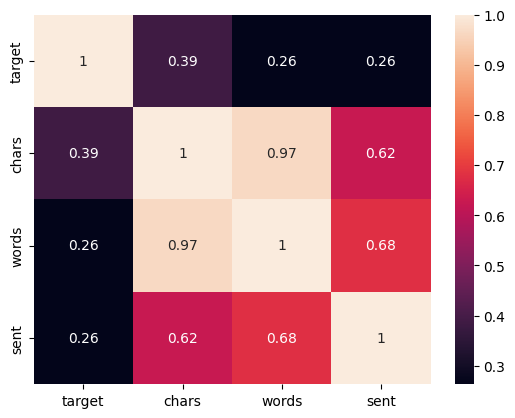

In [128]:
sns.heatmap(data_train[['target', 'chars', 'words', 'sent']].corr(), annot=True)

In [153]:
from nltk.corpus import stopwords

In [154]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itsab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
import string

In [147]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [155]:
def sms_transf(sms):
    sms = sms.lower()
    sms = nltk.word_tokenize(sms) #now the sms are converted in a list

    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)

    sms = y[:]
    y.clear()

    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    sms = y[:]
    y.clear()

    for i in sms:
        y.append(ps.stem(i))

    return " ".join(y)

In [157]:
data_train['sms_trans'] = data_train['sms'].apply(sms_transf)

In [158]:
data_train.head(5)

,target,sms,chars,words,sent,sms_trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [181]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'black')

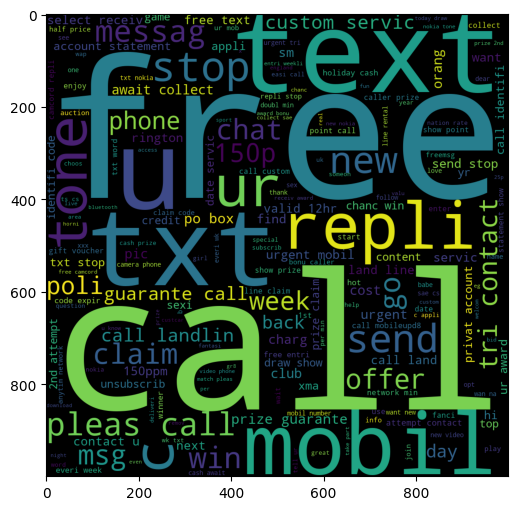

In [182]:
spam_wc = wc.generate(data_train[data_train['target']==1]['sms_trans'].str.cat(sep=" "))

plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

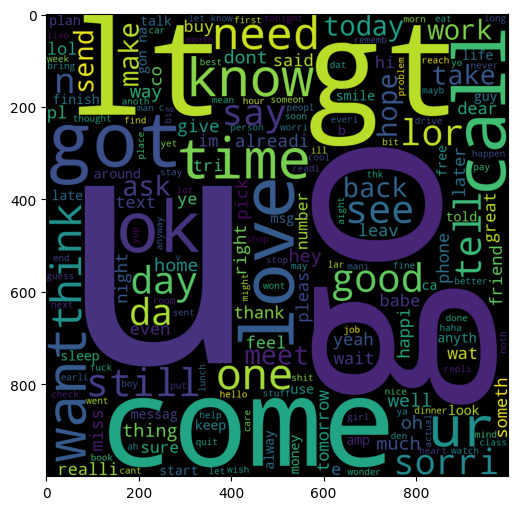

In [183]:
spam_wc = wc.generate(data_train[data_train['target']==0]['sms_trans'].str.cat(sep=" "))

plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [186]:
data_train[data_train['target']==1]['sms_trans'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [184]:
spam=[]

for msg in data_train[data_train['target']==1]['sms_trans'].tolist():
    for word in msg.split():
        spam.append(word)

In [187]:
len(spam)

9936

In [189]:
from collections import Counter
Counter(spam).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [190]:
ham=[]

for msg in data_train[data_train['target']==0]['sms_trans'].tolist():
    for word in msg.split():
        ham.append(word)

In [191]:
from collections import Counter
Counter(ham).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

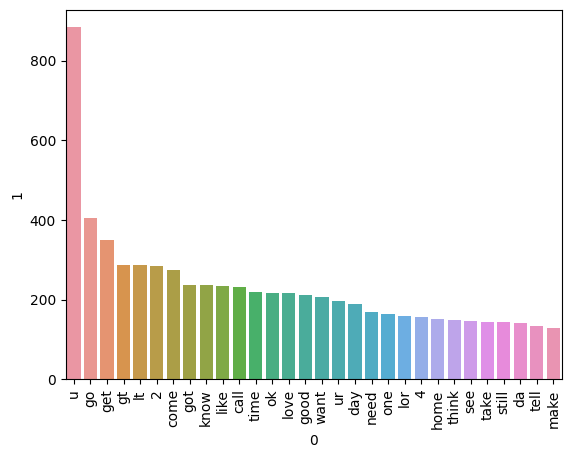

In [205]:
sns.barplot(x=pd.DataFrame(Counter(ham).most_common(30))[0],y=pd.DataFrame(Counter(ham).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

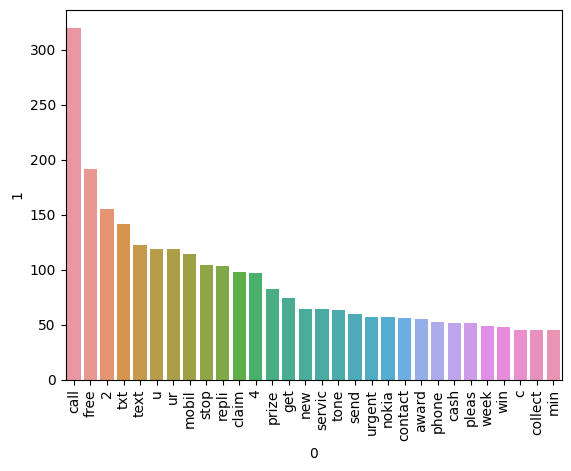

In [206]:
sns.barplot(x=pd.DataFrame(Counter(spam).most_common(30))[0],y=pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [222]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [223]:
x = cv.fit_transform(data_train['sms_trans']).toarray()
x1 = tf.fit_transform(data_train['sms_trans']).toarray()

y = data_train['target'].values

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 ,random_state=2)

x1_train, x1_test, y_train, y_test = train_test_split(x1,y, test_size = 0.2 ,random_state=2)

In [211]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gsb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [215]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [216]:
gsb.fit(x_train, y_train)
y_pred_gsb = gsb.predict(x_test)
print(accuracy_score(y_test, y_pred_gsb))
print(confusion_matrix(y_test, y_pred_gsb))
print(precision_score(y_test, y_pred_gsb))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [225]:
gsb.fit(x1_train, y_train)
y_pred_gsb = gsb.predict(x1_test)
print(accuracy_score(y_test, y_pred_gsb))
print(confusion_matrix(y_test, y_pred_gsb))
print(precision_score(y_test, y_pred_gsb))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [217]:
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [226]:
mnb.fit(x1_train, y_train)
y_pred_mnb = mnb.predict(x1_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [218]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [227]:
bnb.fit(x1_train, y_train)
y_pred_bnb = bnb.predict(x1_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [229]:
import pickle 
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(sms_transf, open('transf.pkl', 'wb'))